# Reading the dataset from Google Drive
Prior to this operation be sure to have added the [shared folder](https://drive.google.com/open?id=1YqK7ZkM-P2IrqfD7Pj-SCmjz-GWd_1-Y) to your Google Drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!ls "/content/drive/My Drive/cmepda_medphys_dataset"

FEATURES  IMAGES  NETS


In [5]:
DATASETS = "/content/drive/My Drive/cmepda_medphys_dataset"

# Working with DICOM files

In [6]:
%matplotlib inline

`%matplotlib inline` 
is a ‘magic functions’ which sets the backend of matplotlib to the 'inline' backend. It allows to display  the output of plotting commands inline within frontends like the Jupyter notebook, directly below the code cell that produced it. The resulting plots will then also be stored in the notebook document.

## Demo 1: reading a DICOM file using the pydicom package

This example illustrates how to use the pydicom package to open a DICOM file, print some dataset information (metadata), and show images using matplotlib.

Find the documentation and the installation instructions at 
https://pydicom.github.io/pydicom/stable/

You can create and work in an enviroment with python 3 and the numpy library, which is required to manipulate pixel data

In [7]:
!pip install pydicom

     |████████████████████████████████| 1.9MB 6.9MB/s 


In [8]:
import os
import pydicom
import matplotlib.pyplot as plt

In [9]:
filename = os.path.join(DATASETS, "IMAGES", "DICOM_Examples", "Brain_MRI", "IM67_1slice.dcm")
dataset = pydicom.dcmread(filename)

The `dcmread` function returns a *FileDataset* object, which makes accessible the metadata contained in the DICOM header and the image as numpy array.

In [10]:
print(type(dataset))

pydicom.dataset.FileDataset


Images are NumPy arrays

In [11]:
print(type(dataset.pixel_array))

<class 'numpy.ndarray'>


In [12]:
# to show the dataset content you can just type dataset 
dataset

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 228
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: MR Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.9590.100.1.2.4365715539284982230698868930013138318
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.3.6.1.4.1.9590.100.1.3.100.9.4
(0002, 0013) Implementation Version Name         SH: 'MATLAB IPT 9.4'
(0002, 0016) Source Application Entity Title     AE: 'SMARDicomSCP'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'OTHER']
(0008, 0016) SOP Class UID                       UI: MR Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.95

In [13]:
# Normal mode:
print()
print("Filename.........:", filename)
print("Storage type.....:", dataset.SOPClassUID)
print()

pat_name = dataset.PatientName
display_name = pat_name.family_name + ", " + pat_name.given_name
display_name = ','.join([pat_name.family_name, pat_name.given_name])
print("Patient's name...:", display_name)
print("Patient id.......:", dataset.PatientID)
print("Modality.........:", dataset.Modality)
print("Study Date.......:", dataset.StudyDate)

if 'PixelData' in dataset:
    rows = int(dataset.Rows)
    cols = int(dataset.Columns)
    print("Image size.......: {rows:d} x {cols:d}, {size:d} bytes".format(
        rows=rows, cols=cols, size=len(dataset.PixelData)))
    if 'PixelSpacing' in dataset:
        print("Pixel spacing....:", dataset.PixelSpacing)



Filename.........: /content/drive/My Drive/cmepda_medphys_dataset/IMAGES/DICOM_Examples/Brain_MRI/IM67_1slice.dcm
Storage type.....: 1.2.840.10008.5.1.4.1.1.4

Patient's name...: Maria Bianchi,
Patient id.......: 1234
Modality.........: MR
Study Date.......: 20170217
Image size.......: 512 x 512, 524288 bytes
Pixel spacing....: [0.5, 0.5]


In [14]:
# use .get() if not sure the item exists, and want a default value if missing
print("Slice location...:", dataset.get('SliceLocation', "(missing)"))

Slice location...: 32.98758698


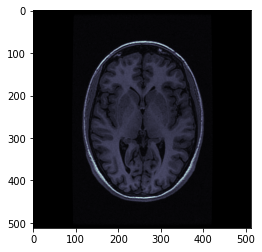

In [15]:
# plot the image using matplotlib
plt.imshow(dataset.pixel_array, cmap=plt.cm.bone)
plt.show()